Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random
import numpy as np
import scipy as sc
import scipy.stats as st

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from stats_utils import plotMN, plot_empirical_distribution

## Datos de viento y normal 2D

Vamos a examinar datos de viento de una boya cerca del puerto de Cádiz.

 - VelV   : Velocidad Media del Viento                     (m/s)
 - DirV   : Direccion Media de PROCEDENCIA del Viento      (0=N,90=E)

También tiene otros datos que vamos a ignorar.

In [2]:
simar=pd.read_csv('SIMAR_fake.csv')
simar.head()

AA  MM  DD  HH  Hm0  Tm02    Tp   DirM  Hm0_V  DirM_V  Hm0_F1  Tm02_F1  \
0  2006  12  13  15  0.3  10.9  12.1  272.0    NaN     NaN     NaN      NaN   
1  2006  12  13  18  0.3  10.3  12.0  267.0    NaN     NaN     NaN      NaN   
2  2006  12  13  21  0.3  10.3  11.8  268.0    NaN     NaN     NaN      NaN   
3  2006  12  14   0  0.3  10.7  11.6  271.0    NaN     NaN     NaN      NaN   
4  2006  12  14   3  0.3  10.6  11.4  269.0    NaN     NaN     NaN      NaN   

   DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  VelV  DirV  
0      NaN     NaN      NaN      NaN   NaN   NaN  
1      NaN     NaN      NaN      NaN   NaN   NaN  
2      NaN     NaN      NaN      NaN   NaN   NaN  
3      NaN     NaN      NaN      NaN   NaN   NaN  
4      NaN     NaN      NaN      NaN   NaN   NaN

In [3]:
simar.tail()

AA  MM  DD  HH  Hm0  Tm02   Tp   DirM  Hm0_V  DirM_V  Hm0_F1  \
100191  2019   1  30  20  1.0   4.6  4.6  200.0    NaN     NaN     NaN   
100192  2019   1  30  21  1.0   4.6  4.6  201.0    NaN     NaN     NaN   
100193  2019   1  30  22  1.0   4.5  4.6  200.0    NaN     NaN     NaN   
100194  2019   1  30  23  0.9   4.5  4.4  200.0    NaN     NaN     NaN   
100195  2019   1  31   0  0.9   4.4  4.3  199.0    NaN     NaN     NaN   

        Tm02_F1  DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  VelV  DirV  
100191      NaN      NaN     NaN      NaN      NaN  11.1  92.0  
100192      NaN      NaN     NaN      NaN      NaN  11.1  85.0  
100193      NaN      NaN     NaN      NaN      NaN   8.9  80.0  
100194      NaN      NaN     NaN      NaN      NaN   9.5  99.0  
100195      NaN      NaN     NaN      NaN      NaN  12.0  93.0

In [4]:
simar.describe()

AA             MM             DD             HH  \
count  100196.000000  100196.000000  100196.000000  100196.000000   
mean     2012.602908       6.546669      15.736287      11.482375   
std         3.515889       3.489739       8.798571       6.922825   
min      2006.000000       1.000000       1.000000       0.000000   
25%      2010.000000       4.000000       8.000000       6.000000   
50%      2012.000000       7.000000      16.000000      12.000000   
75%      2016.000000      10.000000      23.000000      18.000000   
max      2019.000000      12.000000      31.000000      23.000000   

                 Hm0           Tm02             Tp           DirM  Hm0_V  \
count  100196.000000  100196.000000  100184.000000  100196.000000    0.0   
mean        0.746351       6.160956       6.730709     267.390355    NaN   
std         0.509752       2.012358       3.277458      33.017271    NaN   
min         0.000000       0.400000       2.100000       0.000000    NaN   
25%         0.400000       4.600000       4.300000     251.000000    NaN   
50%         0.600000       5.600000       5.200000     279.000000    NaN   
75%         0.900000       7.400000       9.000000     291.000000    NaN   
max         5.900000      16.800000      20.900000     359.000000    NaN   

       DirM_V  Hm0_F1  Tm02_F1  DirM_F1  Hm0_F2  Tm02_F2  DirM_F2  \
count     0.0     0.0      0.0      0.0     0.0      0.0      0.0   
mean      NaN     NaN      NaN      NaN     NaN      NaN      NaN   
std       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
min       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
25%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
50%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
75%       NaN     NaN      NaN      NaN     NaN      NaN      NaN   
max       NaN     NaN      NaN      NaN     NaN      NaN      NaN   

               VelV          DirV  
count  99977.000000  99977.000000  
mean       5.258193    198.900567  
std        2.765232    101.159532  
min        0.000000      0.000000  
25%        3.200000    110.000000  
50%        4.800000    221.000000  
75%        6.900000    288.000000  
max       20.600000    360.000000

### Histogramas de velocidad del viento

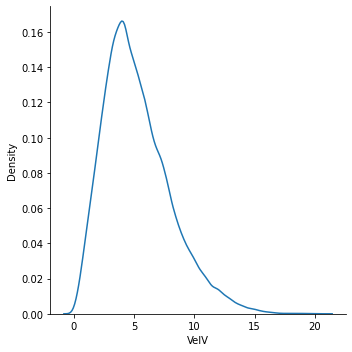

In [5]:
#Tenemos que quitar primero los datos NA (Not Available)
notnas = simar['VelV'].notna()
velV_sin_na = simar['VelV'][notnas]
#en vez del histograma de la librería matplotlib,
#usamos el distplot de la librería "seaborn"
sns.displot(velV_sin_na, kind="kde")

No parece una distribución normal:
 
 - no es simétrica
 - sólo toma valores positivos

### Distribución de la velocidad del viento

Dibujamos el histograma de velocidad del viento junto con la función de densidad de la Normal con la misma media y desviación típica.

Recordamos que la normal que mejor ajusta a los datos *en el sentido de "máxima verosimilitud"* es la $\operatorname{Normal}(\mu, \sigma^2)$ que tiene su parámetro $\mu$ igual a la *media muestral*:
$$
\bar{x} = \frac{1}{n}\sum_{j=1}^n x_j
$$
y su parámetro $\sigma^2$ igual a la *varianza muestral*:
$$
\hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^n (x_j - \bar{x})^2
$$


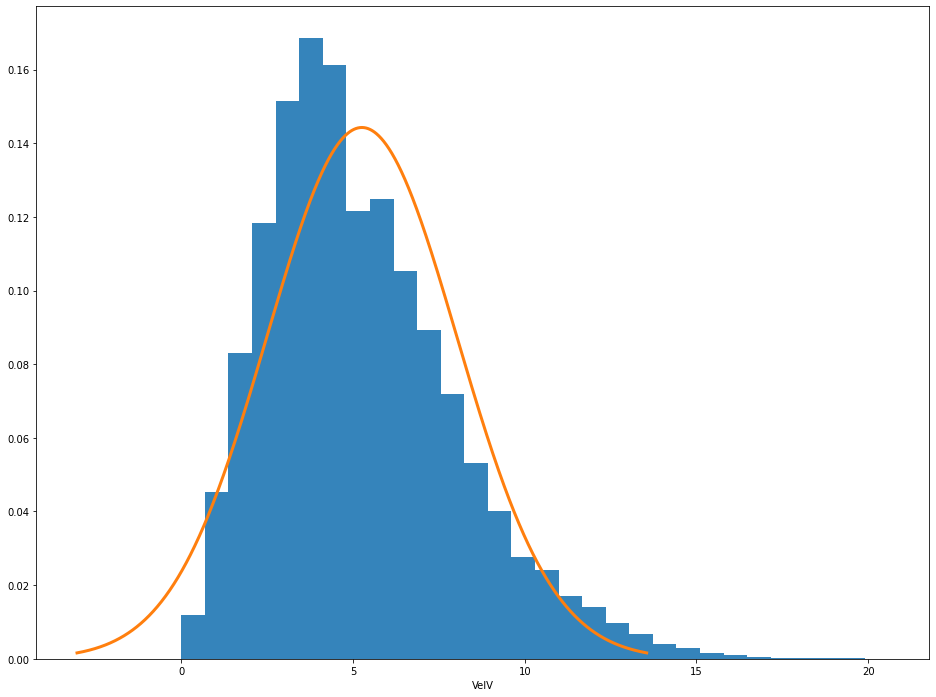

In [6]:
VelV = simar['VelV'][simar['VelV'].notna()]
meanV, stdV = VelV.mean(), VelV.std()

plt.figure(figsize=(16,12))

plt.hist(VelV, bins=30, density=1,alpha=0.9)

xs = np.arange(meanV-3*stdV,meanV+3*stdV,0.01)
N = st.norm(loc=meanV, scale=stdV)
ys = N.pdf(xs)
lines = plt.plot(xs,ys, lw=3)
plt.xlabel('VelV')
plt.show()

La [distribución de Rayleigh](https://en.wikipedia.org/wiki/Rayleigh_distribution) ajusta mucho mejor, si escogemos el parámetro adecuadamente. Para la distribución de Rayleigh, el valor de máxima verosimilitud para el parámetro de escala es:

$${\displaystyle {\widehat {\sigma }}\approx {\sqrt {{\frac {1}{2N}}\sum _{i=1}^{N}x_{i}^{2}}}}$$

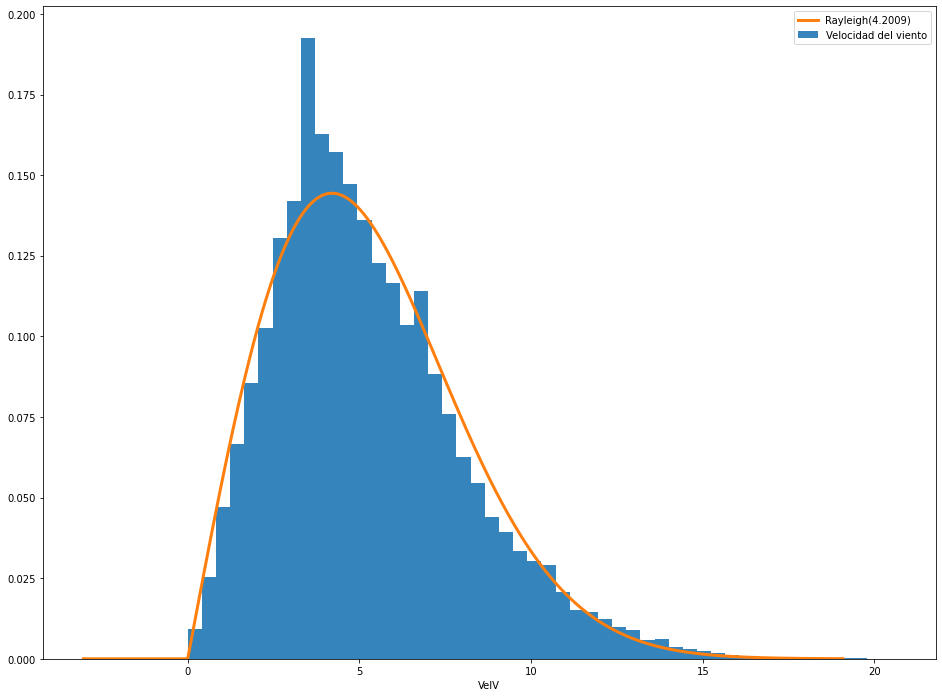

In [8]:
plt.figure(figsize=(16,12))

plt.hist(VelV, bins=50, density=1,alpha=0.9, label='Velocidad del viento')

scale_data = np.sqrt((VelV**2).sum()/(2*len(VelV)))
R = st.rayleigh(scale=scale_data)

xs = np.arange(meanV-3*stdV,meanV+5*stdV,0.01)
ys = R.pdf(xs)
lines = plt.plot(xs,ys, lw=3, label='Rayleigh(%.4f)'%scale_data)
plt.legend()
plt.xlabel('VelV')
plt.show()

El resultado es igual de revelador usando la función de distribución empírica

Comparamos con la normal

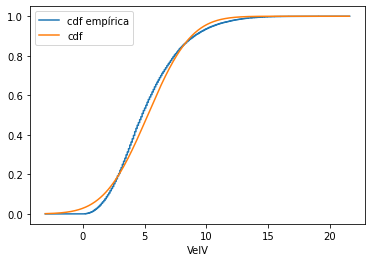

In [9]:
data = simar['VelV'][simar['VelV'].notna()]
mean, std = data.mean(), data.std()
N = st.norm(loc=mean, scale=std)
plot_empirical_distribution(data,N)
plt.xlabel('VelV')
plt.show()

Comparamos con la distribución de Rayleigh

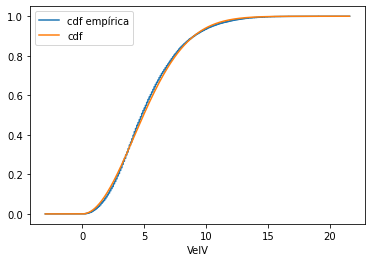

In [10]:
data = simar['VelV'][simar['VelV'].notna()]
mean, std = data.mean(), data.std()
R = st.rayleigh(scale=scale_data)
plot_empirical_distribution(data,R)
plt.xlabel('VelV')
plt.show()

### Maximum likelihood con ``st.rayleigh.fit(data, floc=0)``

En lugar de usar las fórmulas de la tabla (o de la wikipedia, o de cualquier libro de texto), podemos encontrar los valores de los parámetros que maximizan la verosimilitud *numéricamente*, usando la sintaxis:

```python
loc0, scale0 = st.rayleigh.fit(VelV, floc=0)
```

Donde:
 - ``loc`` y ``scale`` son los dos parámetros que ``scipy.stats`` reconoce para ``scipy.stats.rayleigh``
 - ``floc=0`` indica que queremos fijar ``loc`` a ``0``, porque no queremos que la desplace. _(19-04-22: es necesario poner un valor negativo para floc, por pequeño que sea, porque hay datos donde la velocidad del viento es exactamente 0, y en versiones recientes de `scipy.stats` ésto supone un problema para `st.rayleigh.fit` porque 0 está en el límite del dominio)._
 - ``VelV`` son los datos

In [11]:
#Obtenemos un valor muy similar al anterior
st.rayleigh.fit(VelV, floc=-1e-8)

(-1e-08, 4.200894414379206)

## Descomponemos el viento en componentes

Según la wikipedia:

> One example where the Rayleigh distribution naturally arises is when wind velocity is analyzed into its orthogonal 2-dimensional vector components. Assuming that each component is uncorrelated, normally distributed with equal variance, and zero mean, then the overall wind speed (vector magnitude) will be characterized by a Rayleigh distribution.

Descomponemos el viento en sus componentes NS y EW, y vemos que la distribución se parece razonablemente a una normal multivariante, cuyos parámetros hemos encontrado igual que antes.

VEW   -0.458743
VNS    0.006280
dtype: float64
           VEW        VNS
VEW  22.397501  -3.780273
VNS  -3.780273  12.687393


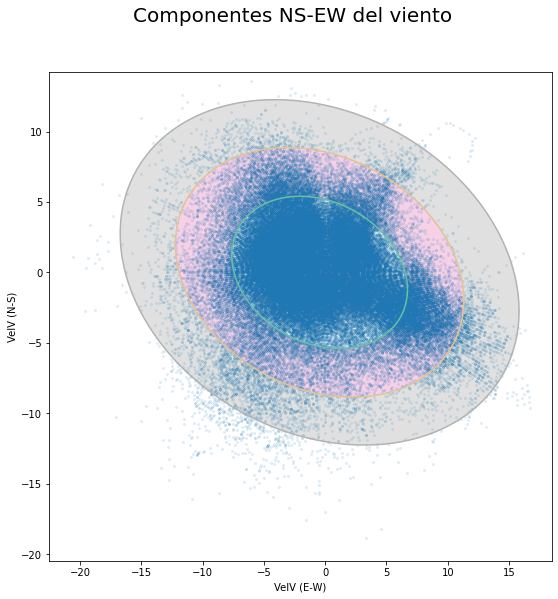

In [21]:
VNS_EW = pd.DataFrame({
        'VEW': np.sin(simar['DirV']*np.pi/180)*simar['VelV'],
        'VNS': np.cos(simar['DirV']*np.pi/180)*simar['VelV'],
    })
data = VNS_EW[['VEW', 'VNS']]
means = data.mean()
Sigma = data.cov()
print(means)
print(Sigma)
MN = st.multivariate_normal(mean=means, cov=Sigma)
fig = plt.figure(figsize=(9,9))
fig.suptitle('Componentes NS-EW del viento', fontsize=20)
plotMN(MN, npoints=200)
plt.scatter(data[data.columns[0]], data[data.columns[1]], s=4, alpha=0.1)

plt.xlabel('VelV (E-W)')
plt.ylabel('VelV (N-S)')
plt.show()

### Ejercicio

Ajusta una normal multivariante a los datos:

 - Tm02   : Periodo Medio Espectral Momentos 0 y 2         (s)
 - Tp     : Periodo de pico espectral                      (s)

Preguntas

 - ¿Hay correlación, positiva o negativa, entre ambas variables?
 - ¿Es la normal multivariante un buen modelo?

In [24]:
data = simar[['Tp', 'Tm02']]
data.mean()

Tp      6.730709
Tm02    6.160956
dtype: float64

### Ejercicio

Ajusta una normal multivariante a los datos:

 - log(Tm02)   : **logaritmo** del Periodo Medio Espectral Momentos 0 y 2         (s)
 - log(Tp)     : **logaritmo** del Periodo de pico espectral                      (s)

Preguntas

 - ¿Hay correlación, positiva o negativa, entre ambas variables?
 - ¿Es la normal multivariante un buen modelo?

In [25]:
logTpTm = pd.DataFrame({
        'logTp': np.log(simar['Tp']),
        'logTm': np.log(simar['Tm02']),
    })
logTpTm.mean()

logTp    1.801397
logTm    1.769036
dtype: float64